# Korean BERT models on huggingface
@hyyoka

- bert-base-uncased
- kobert
- distilkobert
- kcbert
- hanbert

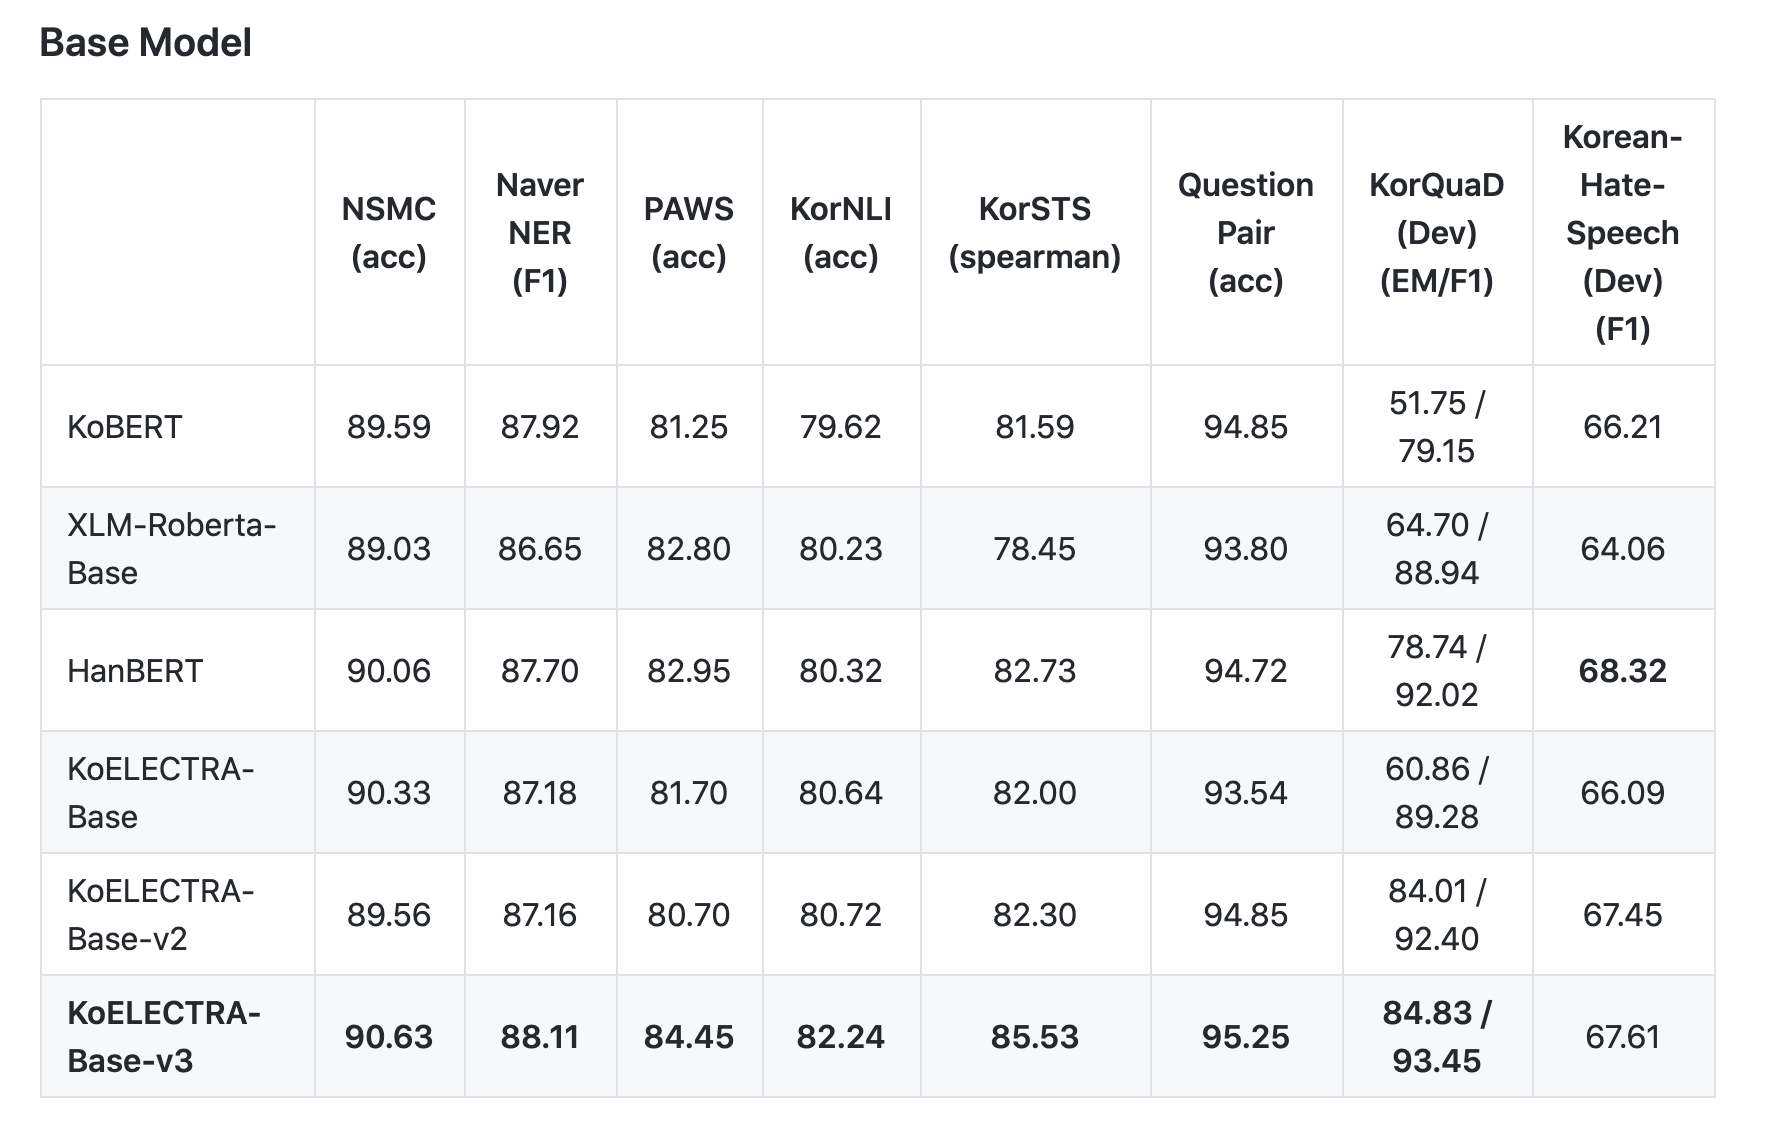

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.9MB 8.5MB/s 
     |████████████████████████████████| 890kB 44.8MB/s 
     |████████████████████████████████| 3.2MB 42.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=e26beb680ab236c2b35f15b1a81af48843257e6574852dba79b40a1e5bfc11dd
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import torch
import torch.nn as nn

In [ ]:
softmax = nn.Softmax()
data = torch.randn(2, 5)
d = softmax(data)
sum(sum(d))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


tensor(2.0000)

## Tokenizers

In [ ]:
from transformers import BertTokenizer, ElectraTokenizer

In [ ]:
# 구글 구축한 사전학습된 벡터
tokenizer = BertTokenizer.from_pretrained(
    "bert-base-multilingual-uncased", 
    do_lower_case=False,
)

In [ ]:
# 이준범님이 구축한 사전학습된 벡터
kc_tokenizer = BertTokenizer.from_pretrained(
    "beomi/kcbert-base", 
    do_lower_case=False,
)

In [ ]:
ko_tokenizer = BertTokenizer.from_pretrained(
    "monologg/kobert", 
    do_lower_case=False,
)

In [ ]:
elec_tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

In [ ]:
text = "여자가 그러면 안되지."

In [ ]:
tokenizer.tokenize(text)

['[UNK]', '[UNK]', '[UNK]', '.']

In [ ]:
kc_tokenizer.tokenize(text)

['여자가', '그러면', '안되지', '.']

In [ ]:
ko_tokenizer.tokenize(text)

['[UNK]', '[UNK]', '[UNK]', '.']

In [ ]:
elec_tokenizer.tokenize(text)

['여자', '##가', '그러', '##면', '안', '##되', '##지', '.']

## Multilingual BERT-base

In [ ]:
from transformers import BertForSequenceClassification


model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
encoded_input = elec_tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
output

SequenceClassifierOutput([('logits',
                           tensor([[-0.1731, -0.1478]], grad_fn=<AddmmBackward>))])

# kcbert


In [ ]:
from transformers import BertConfig, BertModel

In [ ]:
pretrained_model_config = BertConfig.from_pretrained(
    "beomi/kcbert-base", 
    num_labels=2,
)

In [ ]:
kc_model = BertModel.from_pretrained(
    "beomi/kcbert-base", 
    config = pretrained_model_config,
)

In [ ]:
encoded_input = elec_tokenizer(text, return_tensors='pt')
output = kc_model(**encoded_input)

In [ ]:
classifier = nn.Linear(7680, 2)

In [ ]:
output[0].size()

torch.Size([1, 10, 768])

In [ ]:
# last hidden
out = output[0].reshape(1,-1)
o = classifier(out)
o

tensor([[0.2651, 0.7112]], grad_fn=<AddmmBackward>)

## KoBERT

In [ ]:
from transformers import DistilBertModel

In [ ]:
pretrained_model_config = BertConfig.from_pretrained(
    "monologg/kobert", 
    num_labels=2,
)
ko_model = BertModel.from_pretrained(
    "monologg/kobert", 
    config = pretrained_model_config,
)

In [ ]:
features = elec_tokenizer(
    [text, "."], 
    padding = "max_length", 
    max_length = 12,
    truncation=True,
)
# 위의 버트모델은 토치로 개발 -> 토치텐서로 각각 바꾸어줘야함
features = {k:torch.tensor(v) for k,v in features.items()}

In [ ]:
output = ko_model(**features)

In [ ]:
output[0][0].shape
classifier = nn.Linear(12*768, 2)

In [ ]:
# last hidden
out = output[0][0].reshape(1,-1)
o = classifier(out)
o

tensor([[0.1541, 0.1928]], grad_fn=<AddmmBackward>)

## Distilkobert

In [ ]:
pretrained_model_config = BertConfig.from_pretrained(
    "monologg/distilkobert", 
    num_labels=2,
)
dko_model = BertModel.from_pretrained(
    "monologg/distilkobert", 
    config = pretrained_model_config,
)

Some weights of the model checkpoint at monologg/distilkobert were not used when initializing BertModel: ['distilbert.embeddings.word_embeddings.weight', 'distilbert.embeddings.position_embeddings.weight', 'distilbert.embeddings.LayerNorm.weight', 'distilbert.embeddings.LayerNorm.bias', 'distilbert.transformer.layer.0.attention.q_lin.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.transformer.layer.0.attention.k_lin.weight', 'distilbert.transformer.layer.0.attention.k_lin.bias', 'distilbert.transformer.layer.0.attention.v_lin.weight', 'distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.0.attention.out_lin.weight', 'distilbert.transformer.layer.0.attention.out_lin.bias', 'distilbert.transformer.layer.0.sa_layer_norm.weight', 'distilbert.transformer.layer.0.sa_layer_norm.bias', 'distilbert.transformer.layer.0.ffn.lin1.weight', 'distilbert.transformer.layer.0.ffn.lin1.bias', 'distilbert.transformer.layer.0.ffn.lin2.weight', 'dis

In [ ]:
output = dko_model(**features)

In [ ]:
print(output[0][0].shape)
classifier = nn.Linear(12*768, 2)

torch.Size([12, 768])


In [ ]:
# last hidden
out = output[0][0].reshape(1,-1)
o = classifier(out)
o

tensor([[-0.0976, -1.0998]], grad_fn=<AddmmBackward>)

# Ko-electra

In [ ]:
from transformers import ElectraModel, ElectraTokenizer, ElectraForSequenceClassification

In [ ]:
model = ElectraForSequenceClassification.from_pretrained("monologg/koelectra-base-v3-discriminator")

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

In [ ]:
encoded_input = elec_tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

In [ ]:
output

SequenceClassifierOutput([('logits',
                           tensor([[ 0.0404, -0.0620]], grad_fn=<AddmmBackward>))])

# HanBERT

In [ ]:
model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/HanBert-54kN-torch')

Some weights of the model checkpoint at /content/drive/MyDrive/HanBert-54kN-torch were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from

In [ ]:
encoded_input = elec_tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

In [ ]:
output

SequenceClassifierOutput([('logits',
                           tensor([[-0.4108,  0.0113]], grad_fn=<AddmmBackward>))])